In [1]:
pip install -U opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 139kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/corel1k.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('images')

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from natsort import natsorted
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
import random

In [15]:
path = "images/image.orig/"
dirs = os.walk(path)
images_name_per_class = []
X = []
Y = []
counter = 1
image_classes = next(os.walk(path))[1]
for _class in image_classes:
    images_in_class = os.listdir(path + _class)
    if "Thumbs.db" in images_in_class:
        images_in_class.remove("Thumbs.db")
    counter = 1
    images_in_class = natsorted(images_in_class)
    print(images_in_class)
    for image_name in images_in_class:
        image_path = path + _class + "/" + image_name
        mat = cv2.imread(image_path)
        mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)
        X.append(cv2.resize(mat, (256, 256)))
        Y.append(_class)
        os.replace(image_path, path + _class + "/" + str(counter) + "__" + _class + ".jpg")
        counter += 1

#X = np.array(X) / 255.

# X_train, X_test, y_train, y_test = train_test_split(values, Y, test_size=0.2, random_state=1)

['1__elephents.jpg', '2__elephents.jpg', '3__elephents.jpg', '4__elephents.jpg', '5__elephents.jpg', '6__elephents.jpg', '7__elephents.jpg', '8__elephents.jpg', '9__elephents.jpg', '10__elephents.jpg', '11__elephents.jpg', '12__elephents.jpg', '13__elephents.jpg', '14__elephents.jpg', '15__elephents.jpg', '16__elephents.jpg', '17__elephents.jpg', '18__elephents.jpg', '19__elephents.jpg', '20__elephents.jpg', '21__elephents.jpg', '22__elephents.jpg', '23__elephents.jpg', '24__elephents.jpg', '25__elephents.jpg', '26__elephents.jpg', '27__elephents.jpg', '28__elephents.jpg', '29__elephents.jpg', '30__elephents.jpg', '31__elephents.jpg', '32__elephents.jpg', '33__elephents.jpg', '34__elephents.jpg', '35__elephents.jpg', '36__elephents.jpg', '37__elephents.jpg', '38__elephents.jpg', '39__elephents.jpg', '40__elephents.jpg', '41__elephents.jpg', '42__elephents.jpg', '43__elephents.jpg', '44__elephents.jpg', '45__elephents.jpg', '46__elephents.jpg', '47__elephents.jpg', '48__elephents.jpg', 

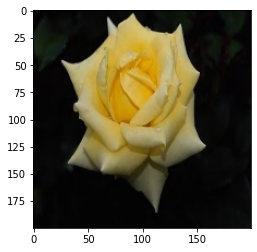

In [ ]:
plt.imshow(X[258])

In [ ]:
Y[258]

'flowers'

In [ ]:
X_new = []
for any_sample in X:
  X_new.append(np.resize(any_sample, (224, 224, 3)))

In [ ]:
len(X_new[0])

224

In [ ]:

model = VGG16(include_top=True)
images = preprocess_input(np.array(X_new))
features = model.predict(np.array(X_new))


In [ ]:
features.shape

(1000, 1000)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(features)
NearestNeighbors(n_neighbors=8)
x = neigh.kneighbors([features[250]], return_distance=False)
x = x.flatten()

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(X[x[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **`Autoencoder`**

In [16]:
input_img = Input(shape=(256, 256, 3))  # adapt this if using `channels_first` image data format
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((4, 4), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((4, 4), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((4, 4), padding='same', name='encoder')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((4, 4))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



In [26]:
autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
encoder (MaxPooling2D)       (None, 4, 4, 32)         

In [18]:
X = np.array(X)
X[14].shape
#autoencoder.summary()

(256, 256, 3)

In [17]:
batch_size = 8
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
train_generator = train_datagen.flow_from_directory(
    '/content/images/image.orig',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='input'
    )
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
validation_generator = test_datagen.flow_from_directory(
    '/content/images/image.orig',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='input'
    )
train_generator

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [19]:
autoencoder.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=1,
        validation_steps=1000 // batch_size)


125/125 [==============================] - 268s 2s/step - loss: 0.6928


In [20]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
features = encoder.predict(X)
features = features.reshape(features.shape[0], features.shape[1] * features.shape[2] * features.shape[3])


In [24]:
features.shape

(1000, 512)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(features)
NearestNeighbors(n_neighbors=8)
x = neigh.kneighbors([features[96]], return_distance=False)
x = x.flatten()
x

array([96, 74, 48, 57, 27, 97, 46, 62])

In [ ]:

plt.figure(figsize=(20, 10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(X[x[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


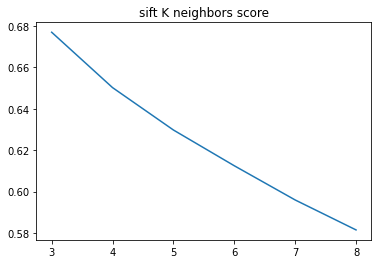

In [ ]:
Y = np.array(Y)
scores = []
def get_score(k, samples, features):
 neigh = NearestNeighbors(n_neighbors=k)
 neigh.fit(features)
 NearestNeighbors(n_neighbors=k)
 ngh = neigh.kneighbors(features, return_distance=False)
 for any_ngh in ngh:
  _classes = Y[any_ngh]
  _ , counts = np.unique(_classes, return_counts=True)
  scores.append(counts[0] / sum(counts))
 return np.mean(scores)  
k = [3, 4, 5, 6, 7, 8]
all_scores = []
for any_k in k:
 all_scores.append(get_score(any_k,X,features))
plt.title('sift K neighbors score')
plt.plot(k, all_scores)

In [ ]:
all_scores

[0.677,
 0.65025,
 0.6297666666666667,
 0.6124916666666667,
 0.5959647619047619,
 0.5814914682539682]

**PCA**

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=10)
X = np.array(X)
reshape_arr = np.reshape(X, (-1, X.shape[1] * X.shape[2] * X.shape[3])) 
features = pca.fit_transform(reshape_arr)

In [ ]:
all_features = []
for i in range(2, 100, 8):
 pca = PCA(n_components=i)
 X = np.array(X)
 reshape_arr = np.reshape(X, (-1, X.shape[1] * X.shape[2] * X.shape[3])) 
 features = pca.fit_transform(reshape_arr)
 all_features.append(features)

13

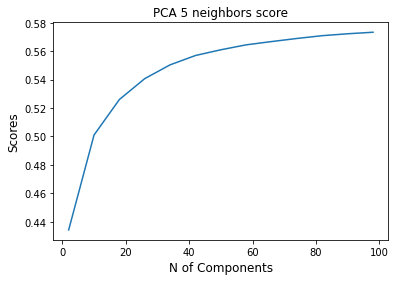

In [ ]:
Y = np.array(Y)
from sklearn.neighbors import NearestNeighbors
scores = []
def get_score(k, samples, features):
 neigh = NearestNeighbors(n_neighbors=k)
 neigh.fit(features)
 NearestNeighbors(n_neighbors=k)
 ngh = neigh.kneighbors(features, return_distance=False)
 for any_ngh in ngh:
  _classes = Y[any_ngh]
  _ , counts = np.unique(_classes, return_counts=True)
  scores.append(counts[0] / sum(counts))
 return np.mean(scores)  
k = np.arange(2,100,8)
all_scores = []
for any_features in all_features:
 all_scores.append(get_score(5,X,any_features))
plt.title('PCA 5 neighbors score')
plt.xlabel('N of Components', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.plot(k, all_scores)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(features)
NearestNeighbors(n_neighbors=8)
x = neigh.kneighbors([features[23]], return_distance=False)
x = x.flatten()
x

array([ 23,  21,  22,  37,  14,  87, 297,   1])

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(X[x[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

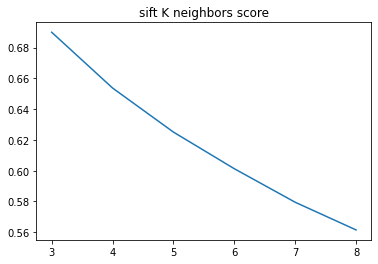

In [ ]:
Y = np.array(Y)
scores = []
def get_score(k, samples, features):
 neigh = NearestNeighbors(n_neighbors=k)
 neigh.fit(features)
 NearestNeighbors(n_neighbors=k)
 ngh = neigh.kneighbors(features, return_distance=False)
 for any_ngh in ngh:
  _classes = Y[any_ngh]
  _ , counts = np.unique(_classes, return_counts=True)
  scores.append(counts[0] / sum(counts))
 return np.mean(scores)  
k = [3, 4, 5, 6, 7, 8]
all_scores = []
for any_k in k:
 all_scores.append(get_score(any_k,X,features))
plt.title('sift K neighbors score')
plt.plot(k, all_scores)


In [ ]:
all_scores

[0.69,
 0.65375,
 0.6251,
 0.6012833333333333,
 0.5794838095238096,
 0.561486507936508]

In [ ]:
import cv2
all_key_points = []
all_desc = []
raw_kp = []
sift = cv2.xfeatures2d.SIFT_create()
for i in range(len(X)):
  gray= cv2.cvtColor(X[i],cv2.COLOR_BGR2GRAY)
  keyPoints, desc = sift.detectAndCompute(gray, None)
  pts = cv2.KeyPoint_convert(keyPoints)
  all_key_points.append(pts)

In [ ]:
points = np.array([[33, 33], [33, 99], [33, 165], [99, 33], [99, 99], [99, 165], [165, 33], [165, 99], [165, 165]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
features = []
neigh = NearestNeighbors(n_neighbors=5)
for any_key in all_key_points:
  neigh.fit(any_key)
  NearestNeighbors(n_neighbors=5)
  indices = neigh.kneighbors(points, return_distance=False)
  feature = []
  for area_indices in indices:
    for idx in area_indices:
      feature.append(any_key[idx])
  features.append(np.array(feature).flatten())

In [ ]:
len(features[0])

90

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(features)
NearestNeighbors(n_neighbors=8)
x = neigh.kneighbors([features[661]], return_distance=False)
x = x.flatten()

In [ ]:

plt.figure(figsize=(20, 10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(X[x[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


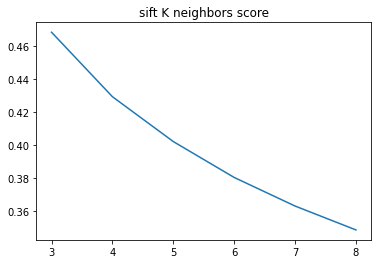

In [ ]:
Y = np.array(Y)
scores = []
def get_score(k, samples, features):
 neigh = NearestNeighbors(n_neighbors=k)
 neigh.fit(features)
 NearestNeighbors(n_neighbors=k)
 ngh = neigh.kneighbors(features, return_distance=False)
 for any_ngh in ngh:
  _classes = Y[any_ngh]
  _ , counts = np.unique(_classes, return_counts=True)
  scores.append(counts[0] / sum(counts))
 return np.mean(scores)  
k = [3, 4, 5, 6, 7, 8]
all_scores = []
for any_k in k:
 all_scores.append(get_score(any_k,X,features))
plt.title('sift K neighbors score')
plt.plot(k, all_scores)

In [ ]:
all_scores

[0.4683333333333333,
 0.4292916666666666,
 0.40212777777777775,
 0.3803875,
 0.36308142857142855,
 0.34860952380952376]

In [ ]:
edges = []
features = []
area_edges = []
for i in range(len(X)):
	edges.append(cv2.Canny(X[i], 100, 200))
edges = np.array(edges)
for i in range(len(edges)):
 area_edges = []
 for j in range(0, len(edges[0]), 4):
  for k in range(0, len(edges[0]), 4):
   g = edges[i,j:j+4,k:k+4]
   area_edges.append(np.count_nonzero(g))
 features.append(area_edges)


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
neigh.fit(features)
NearestNeighbors(n_neighbors=8)
x = neigh.kneighbors([features[116]], return_distance=False)
x = x.flatten()

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(X[x[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
Y = np.array(Y)
scores = []
def get_score(k, samples, features):
 neigh = NearestNeighbors(n_neighbors=k)
 neigh.fit(features)
 NearestNeighbors(n_neighbors=k)
 ngh = neigh.kneighbors(features, return_distance=False)
 for any_ngh in ngh:
  _classes = Y[any_ngh]
  _ , counts = np.unique(_classes, return_counts=True)
  scores.append(counts[0] / sum(counts))
 return np.mean(scores)  

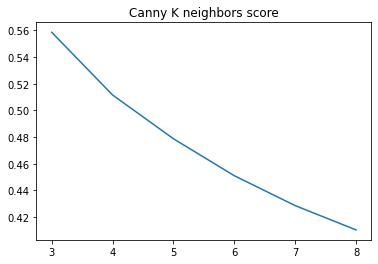

In [ ]:
k = [3, 4, 5, 6, 7, 8]
all_scores = []
for any_k in k:
 all_scores.append(get_score(any_k,X,features))
plt.title('Canny K neighbors score')
plt.plot(k, all_scores)

In [ ]:
import tensorflow as tf
import cv2
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
X = np.array(X)
X = X / 255.
reshape_arr = np.reshape(X, (-1, X.shape[1] * X.shape[2] * X.shape[3])) 
features = pca.fit_transform(reshape_arr)

[Text(0, 0.5, 'F2'), Text(0.5, 0, 'F1')]

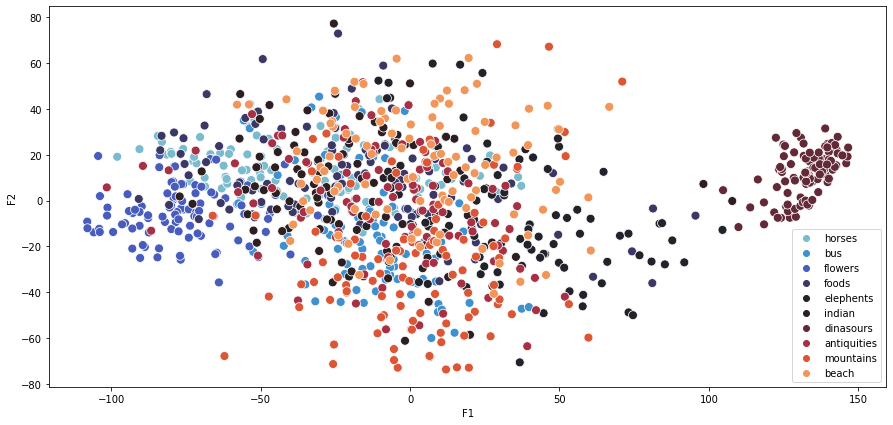

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(
    x=f1, y=f2,
    s=80,
    hue=Y,
    palette=sns.color_palette("icefire", 10),
    legend="full",
)
ax.set(xlabel="F1", ylabel = "F2")